In [1]:
import gzip
import csv
import numpy as np
import pandas as pd
from pandas import DataFrame as df
import xml.etree.ElementTree as et
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
iPRG_MW = pd.read_csv('./iPRG2009_Study.MW.csv')
iPRG_MW.set_index('proteinIds', inplace = True)
iPRG_MW = iPRG_MW.astype({'mw':'float'})

In [3]:
# TendemK

Colors = ['red', 'yellow', 'green', 'blue']

CNumber = [5,5,3,3]
Mean_RY = df()
Mean_G = df()
Mean_B = df()

for order, color in enumerate(Colors):
    countdf = df()

    for i in range(1,CNumber[order]+1):
        cols = ["proteinIds", "MH", "expect"]
        rows = []
        
        filename = './iPRG2009_ECOLI_'+color+'_'+str(i)+'.iPRG2009_Study.tandem.out.gz'
        print(filename)
        f = gzip.open(filename, "r")

        tree = et.parse(f)
        root = tree.getroot()
        
        for node in root:
            protein = node.attrib.get("label")
            mh = node.attrib.get("mh")
            expect = node.attrib.get("expect")
            rows.append({"proteinIds":protein, "MH":mh, "expect":expect})
        f.close()
        
        data_interest = pd.DataFrame(rows, columns = cols).dropna()        
        data_interest = data_interest.astype({'MH':'float', 'expect':'float'})
        
        REV = []
        for p in data_interest['proteinIds']:
            REV.append(p.find('rev_'))
        data_interest['isRev'] = REV
        data_interest.drop(data_interest[data_interest['isRev'] != -1].index, inplace = True)
        CNTM = []
        for p in data_interest['proteinIds']:
            CNTM.append(p.find('Cntm_'))
        data_interest['isCNTM'] = CNTM
        data_interest.drop(data_interest[data_interest['isCNTM'] != -1].index, inplace = True)

        data_cut = data_interest[data_interest['expect'] < 0.05]

        data_group = data_cut.groupby('proteinIds')
        
        cnt = df(data_group.count().iloc[:,0]).transpose()
        cnt.index = [str(i)]
        if i == 1 : countdf = cnt
        else: countdf = countdf.append(cnt)
            
    countdf = countdf.fillna(0)
    if order == 0: Mean_RY =  df(countdf.mean()).transpose()
    elif order == 1: Mean_RY = Mean_RY.append(df(countdf.mean()).transpose())
    elif order == 2: Mean_G = df(countdf.mean())
    elif order == 3: Mean_B = df(countdf.mean())
        
Mean_G.columns = ['green']
Mean_B.columns = ['blue']        

Mean_RY = Mean_RY.transpose().fillna(0)
Mean_RY.columns = ['red', 'yellow']

red_yel_Diff = df(Mean_RY['red']-Mean_RY['yellow'])
red_yel_Diff.columns = ['Difference']
red_yel_Diff_copy = red_yel_Diff.copy()

./iPRG2009_ECOLI_red_1.iPRG2009_Study.tandem.out.gz
./iPRG2009_ECOLI_red_2.iPRG2009_Study.tandem.out.gz
./iPRG2009_ECOLI_red_3.iPRG2009_Study.tandem.out.gz
./iPRG2009_ECOLI_red_4.iPRG2009_Study.tandem.out.gz
./iPRG2009_ECOLI_red_5.iPRG2009_Study.tandem.out.gz
./iPRG2009_ECOLI_yellow_1.iPRG2009_Study.tandem.out.gz
./iPRG2009_ECOLI_yellow_2.iPRG2009_Study.tandem.out.gz
./iPRG2009_ECOLI_yellow_3.iPRG2009_Study.tandem.out.gz
./iPRG2009_ECOLI_yellow_4.iPRG2009_Study.tandem.out.gz
./iPRG2009_ECOLI_yellow_5.iPRG2009_Study.tandem.out.gz
./iPRG2009_ECOLI_green_1.iPRG2009_Study.tandem.out.gz
./iPRG2009_ECOLI_green_2.iPRG2009_Study.tandem.out.gz
./iPRG2009_ECOLI_green_3.iPRG2009_Study.tandem.out.gz
./iPRG2009_ECOLI_blue_1.iPRG2009_Study.tandem.out.gz
./iPRG2009_ECOLI_blue_2.iPRG2009_Study.tandem.out.gz
./iPRG2009_ECOLI_blue_3.iPRG2009_Study.tandem.out.gz


In [4]:
standard = 10
for ind, diff in enumerate(red_yel_Diff['Difference']):
    if Mean_RY['red'][ind] >= standard and Mean_RY['yellow'][ind] >= standard:
        red_yel_Diff.iloc[ind] = 0

In [5]:
blue_est = red_yel_Diff[red_yel_Diff['Difference'] > 2]
green_est = red_yel_Diff[red_yel_Diff['Difference'] < -2]

green_exp = Mean_G[Mean_G['green'] > 1]
blue_exp = Mean_B[Mean_B['blue'] > 1]

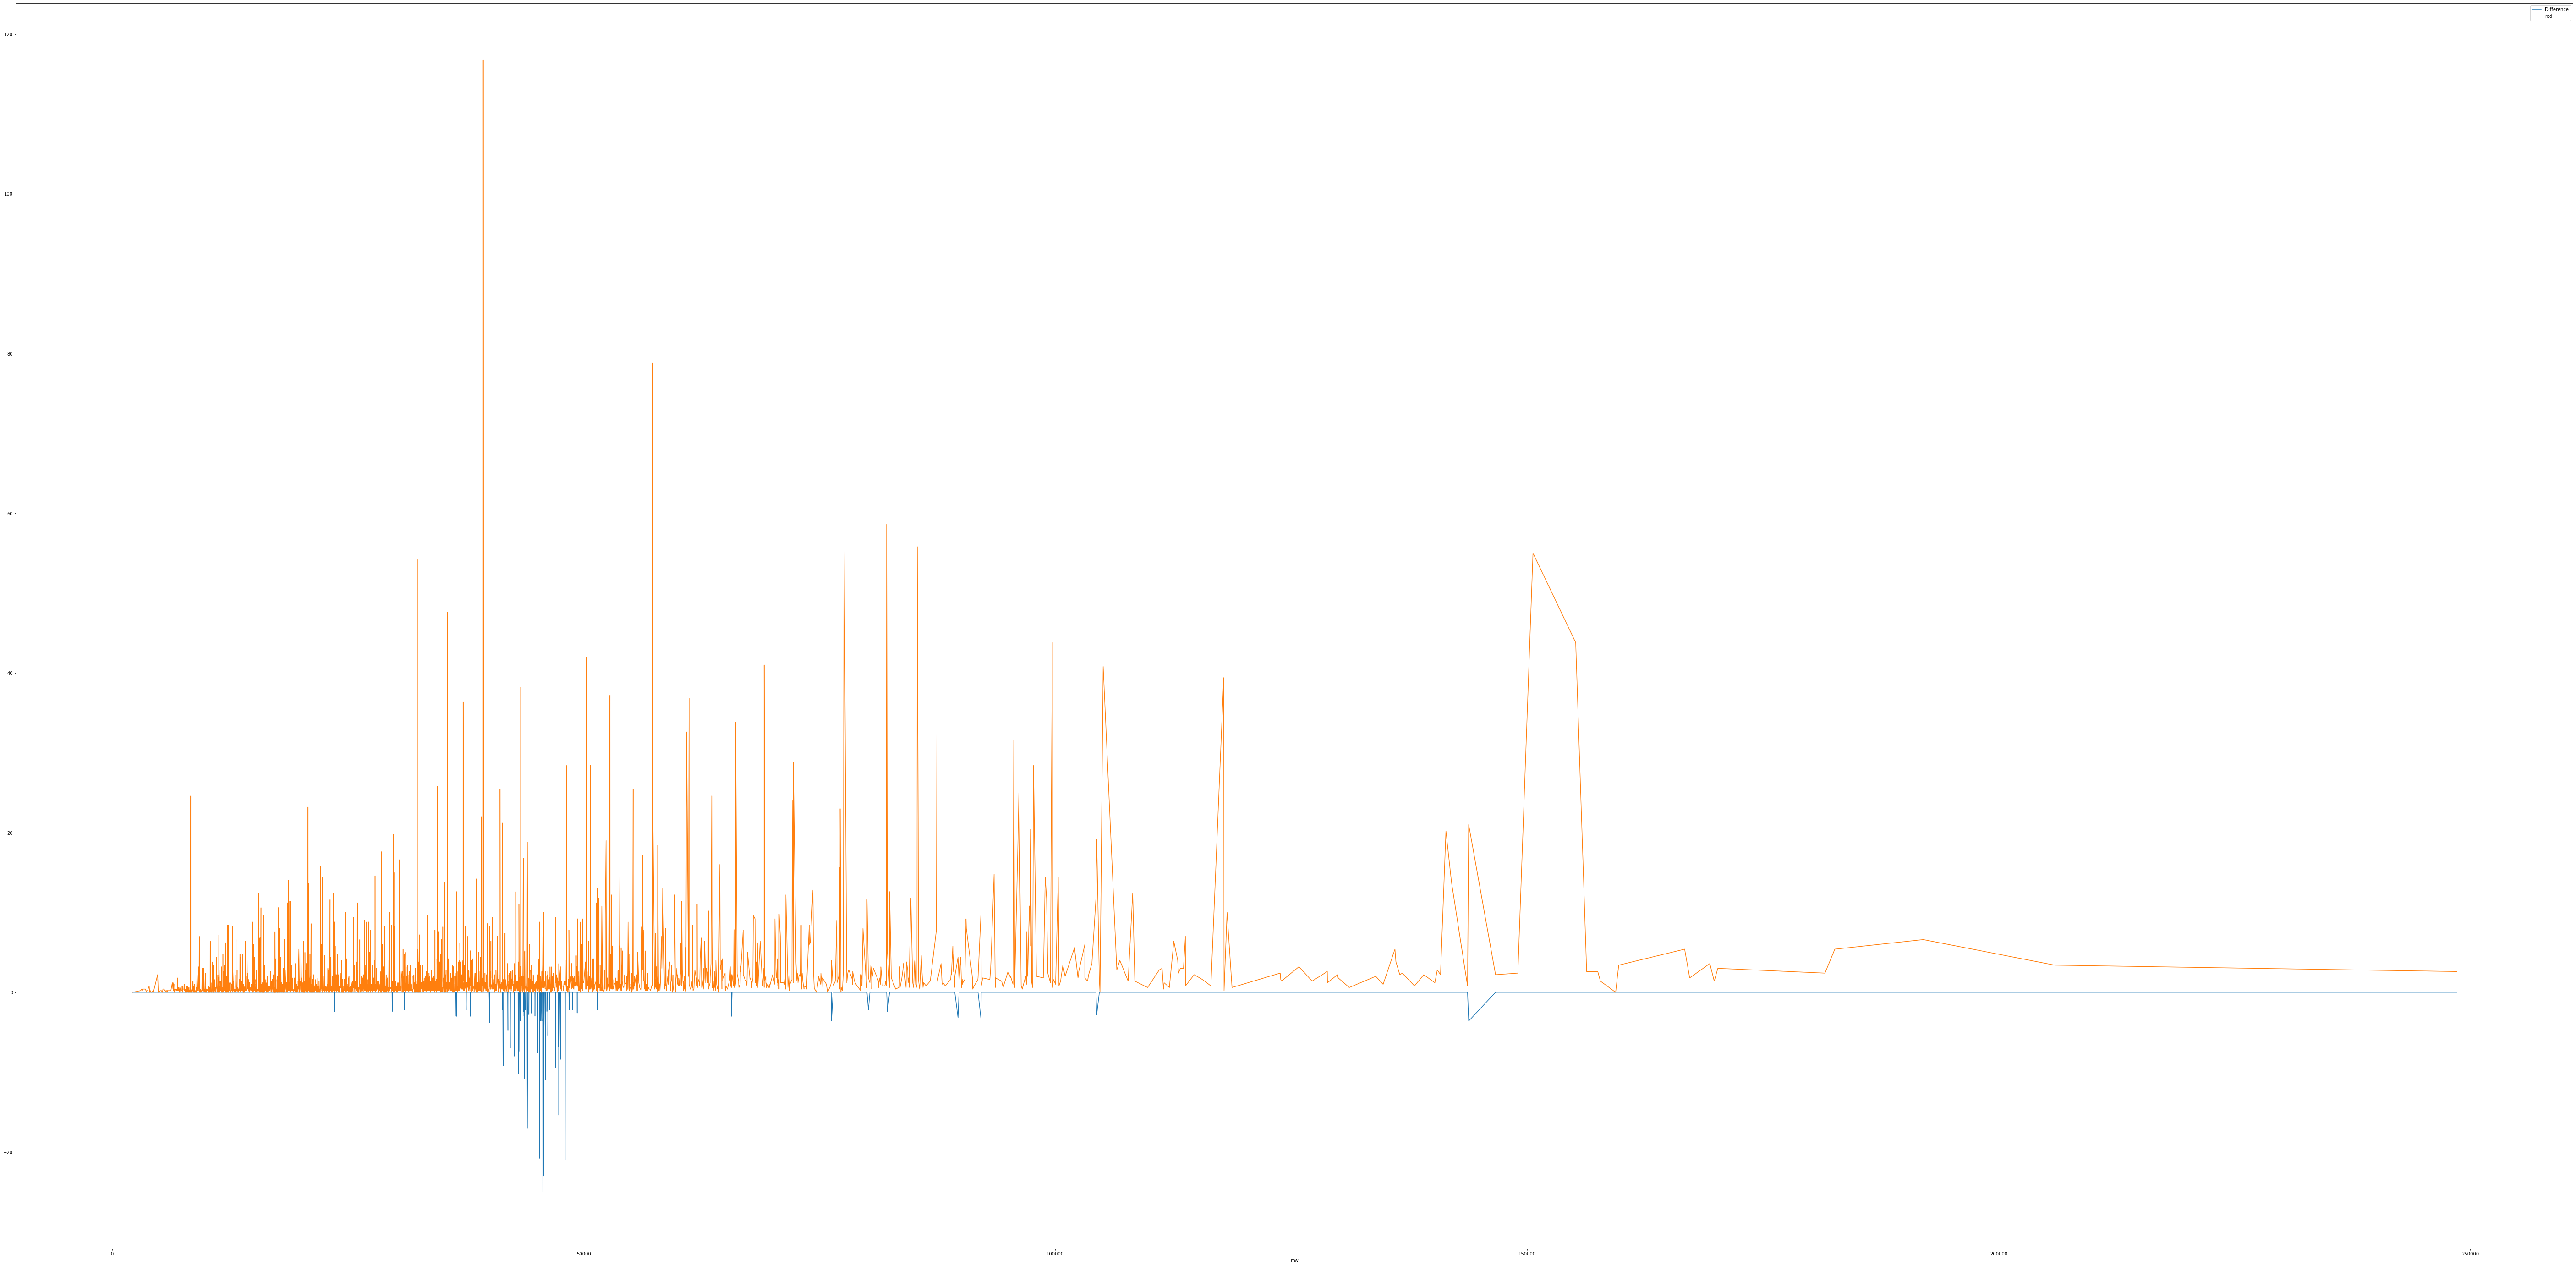

In [6]:
Mean_Rm = df(Mean_RY['red']).transpose()
Mean_Rm = Mean_Rm.append(iPRG_MW.transpose()).dropna(axis = 1).transpose().set_index('mw').transpose()
Mean_Gm = green_est.transpose().append(iPRG_MW.transpose()).dropna(axis = 1).transpose().set_index('mw').transpose()

Mean_RG_mw = Mean_Gm.append(Mean_Rm).transpose()
Mean_RG_mw = Mean_RG_mw.fillna(0)

# sns.lineplot(data = Mean_Rt.transpose(), x = 'mw', y = ['red', 'yellow'])
# plt.show()
plt.rcParams["figure.figsize"] = (100,50)
Mean_RG_mw.plot()
plt.show()

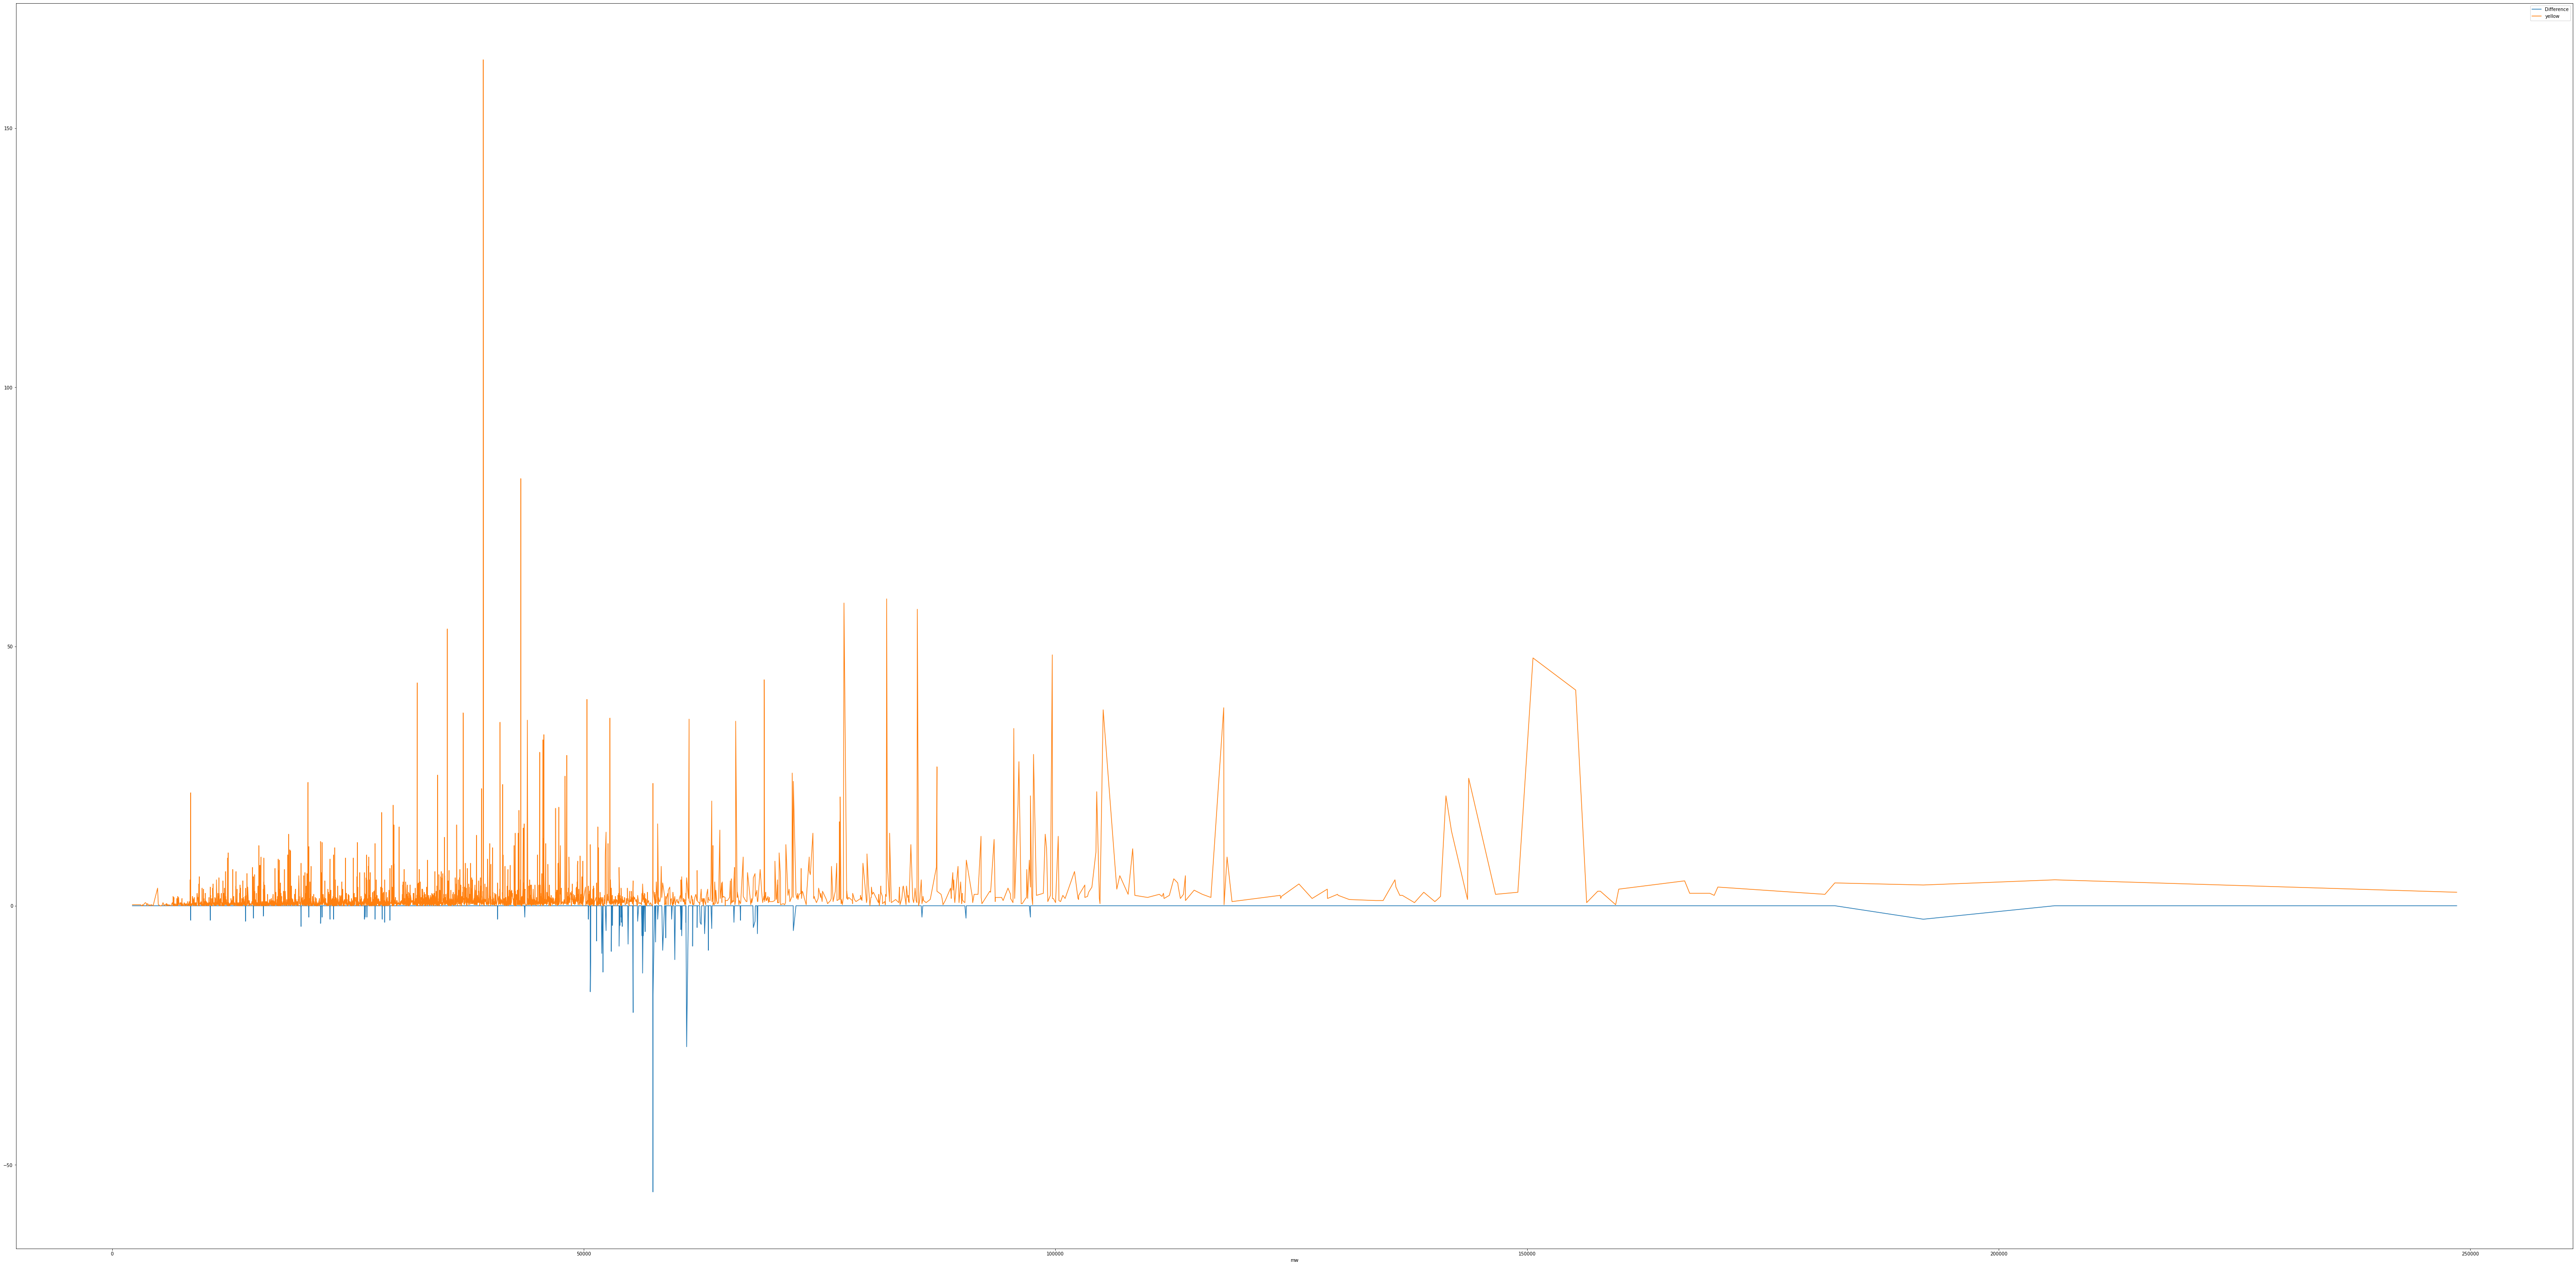

In [7]:
Mean_Ym = df(Mean_RY['yellow']).transpose()
Mean_Ym = Mean_Ym.append(iPRG_MW.transpose()).dropna(axis = 1).transpose().set_index('mw').transpose()
Mean_Bm = -blue_est.transpose().append(iPRG_MW.transpose()).dropna(axis = 1).transpose().set_index('mw').transpose()

Mean_YB_mw = Mean_Bm.append(Mean_Ym).transpose()
Mean_YB_mw = Mean_YB_mw.fillna(0)

Mean_YB_mw.plot()
plt.rcParams["figure.figsize"] = (100,50)
plt.show()

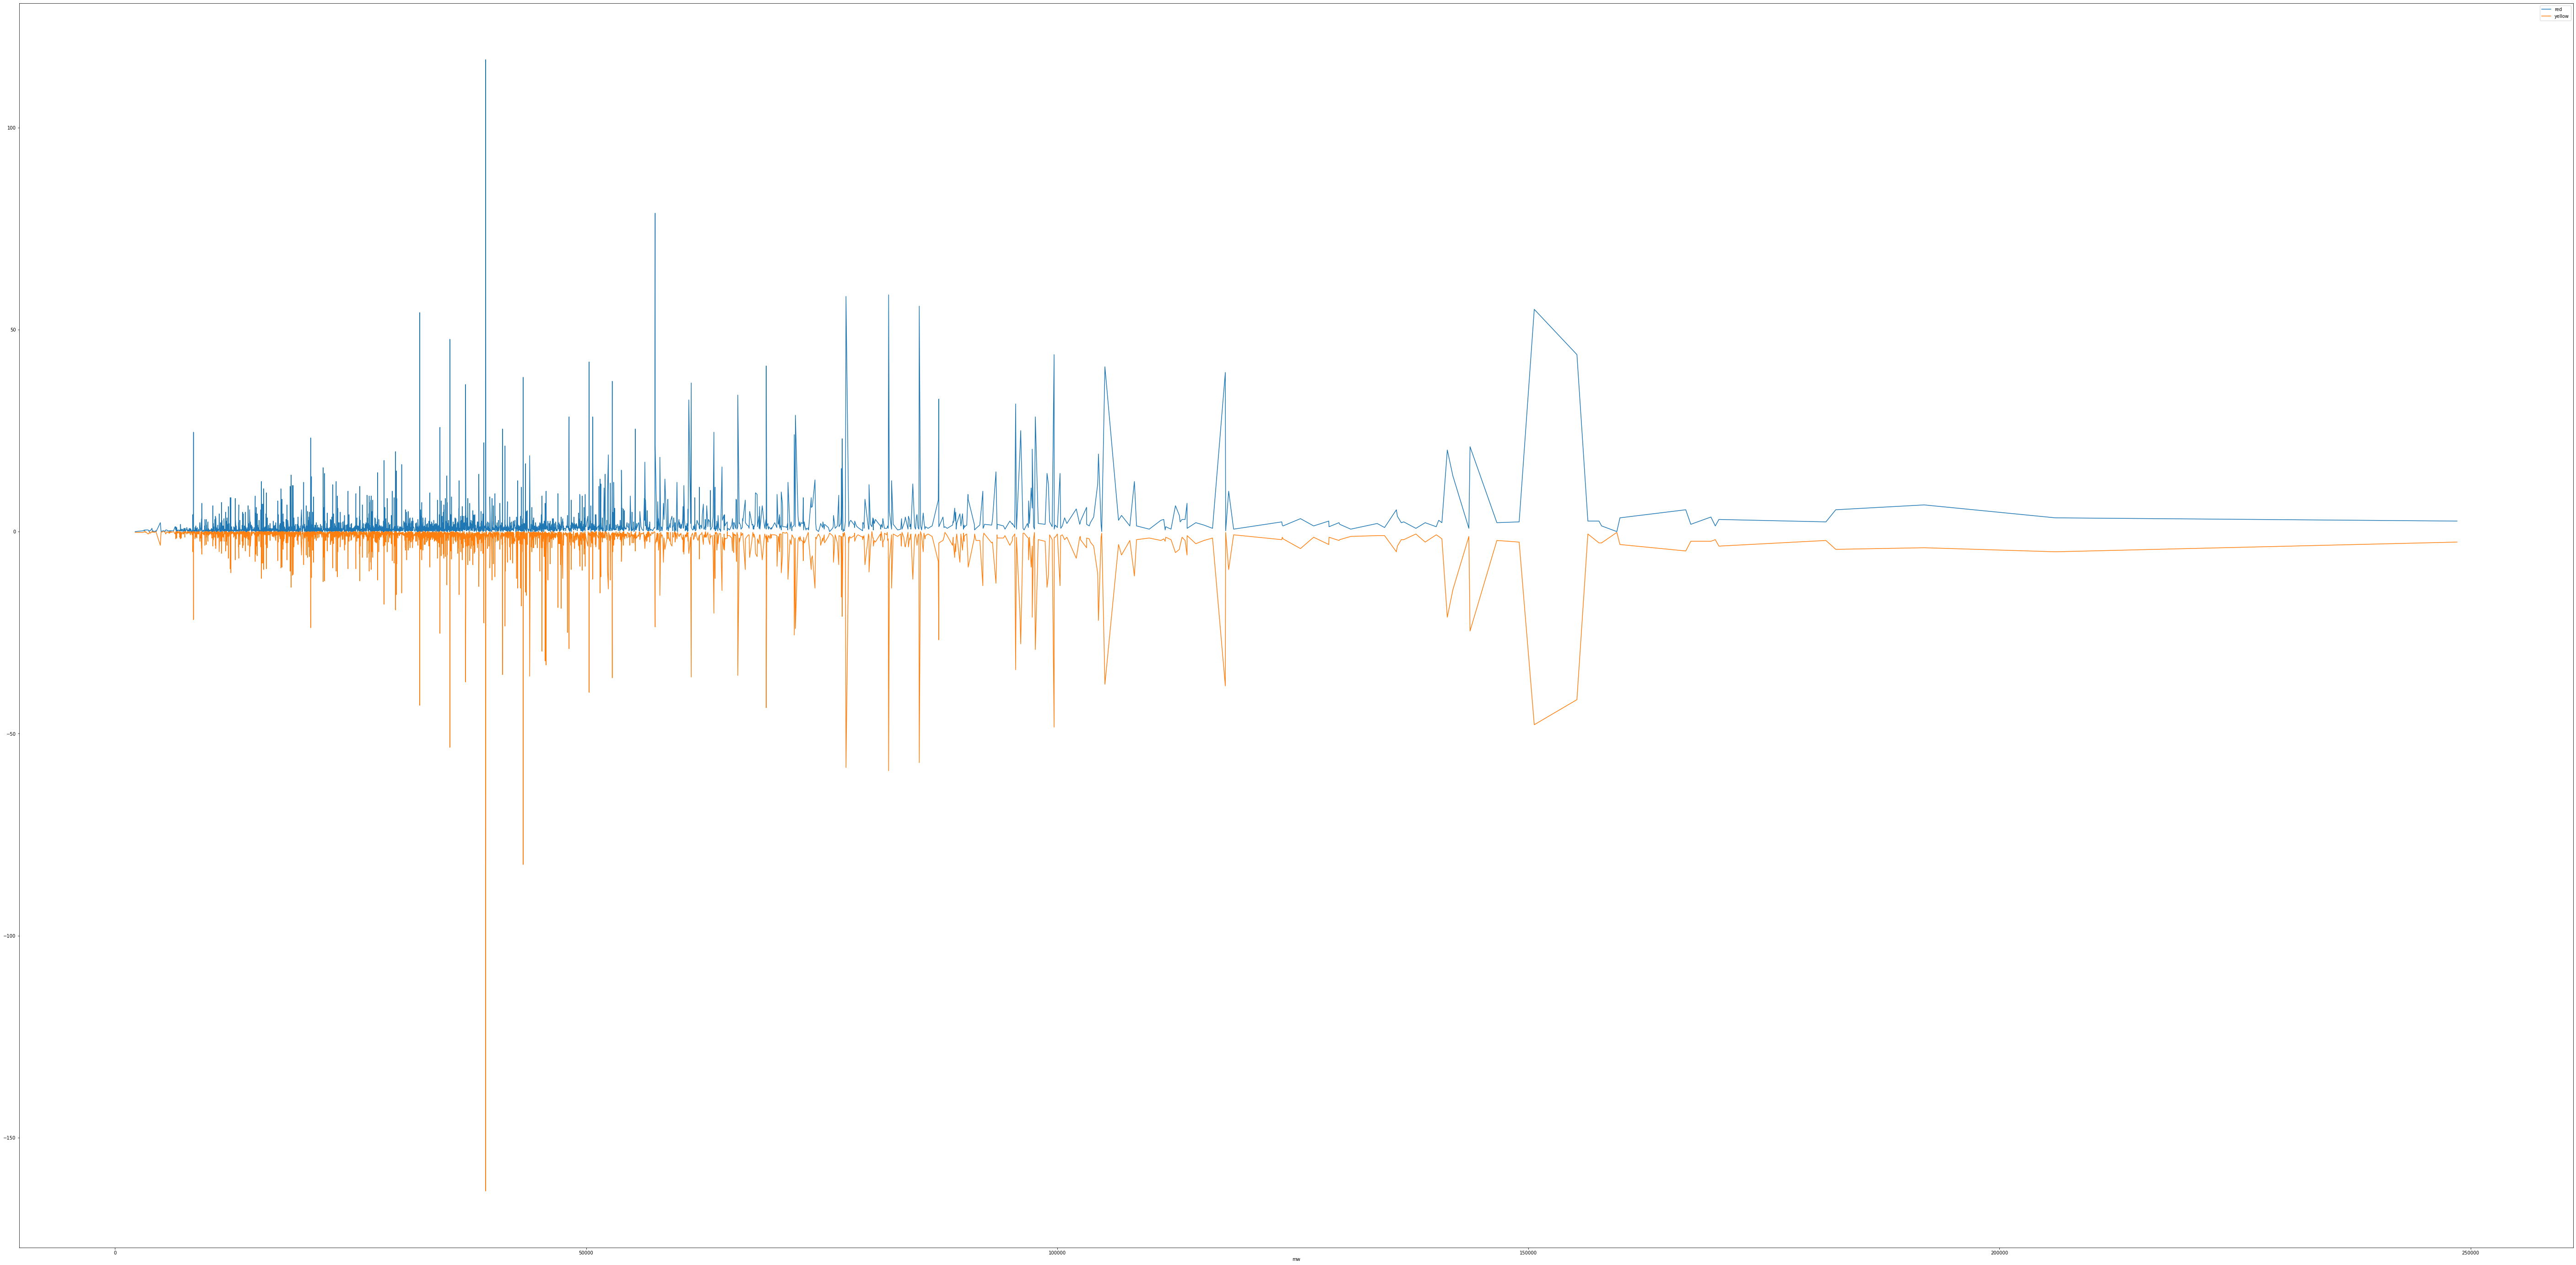

In [8]:
Mean_RY_mw = Mean_Rm.append(-Mean_Ym).transpose()
Mean_RY_mw = Mean_RY_mw.fillna(0)
Mean_RY_mw.sort_index(inplace = True)

Mean_RY_mw.plot()
plt.rcParams["figure.figsize"] = (100,50)
plt.show()

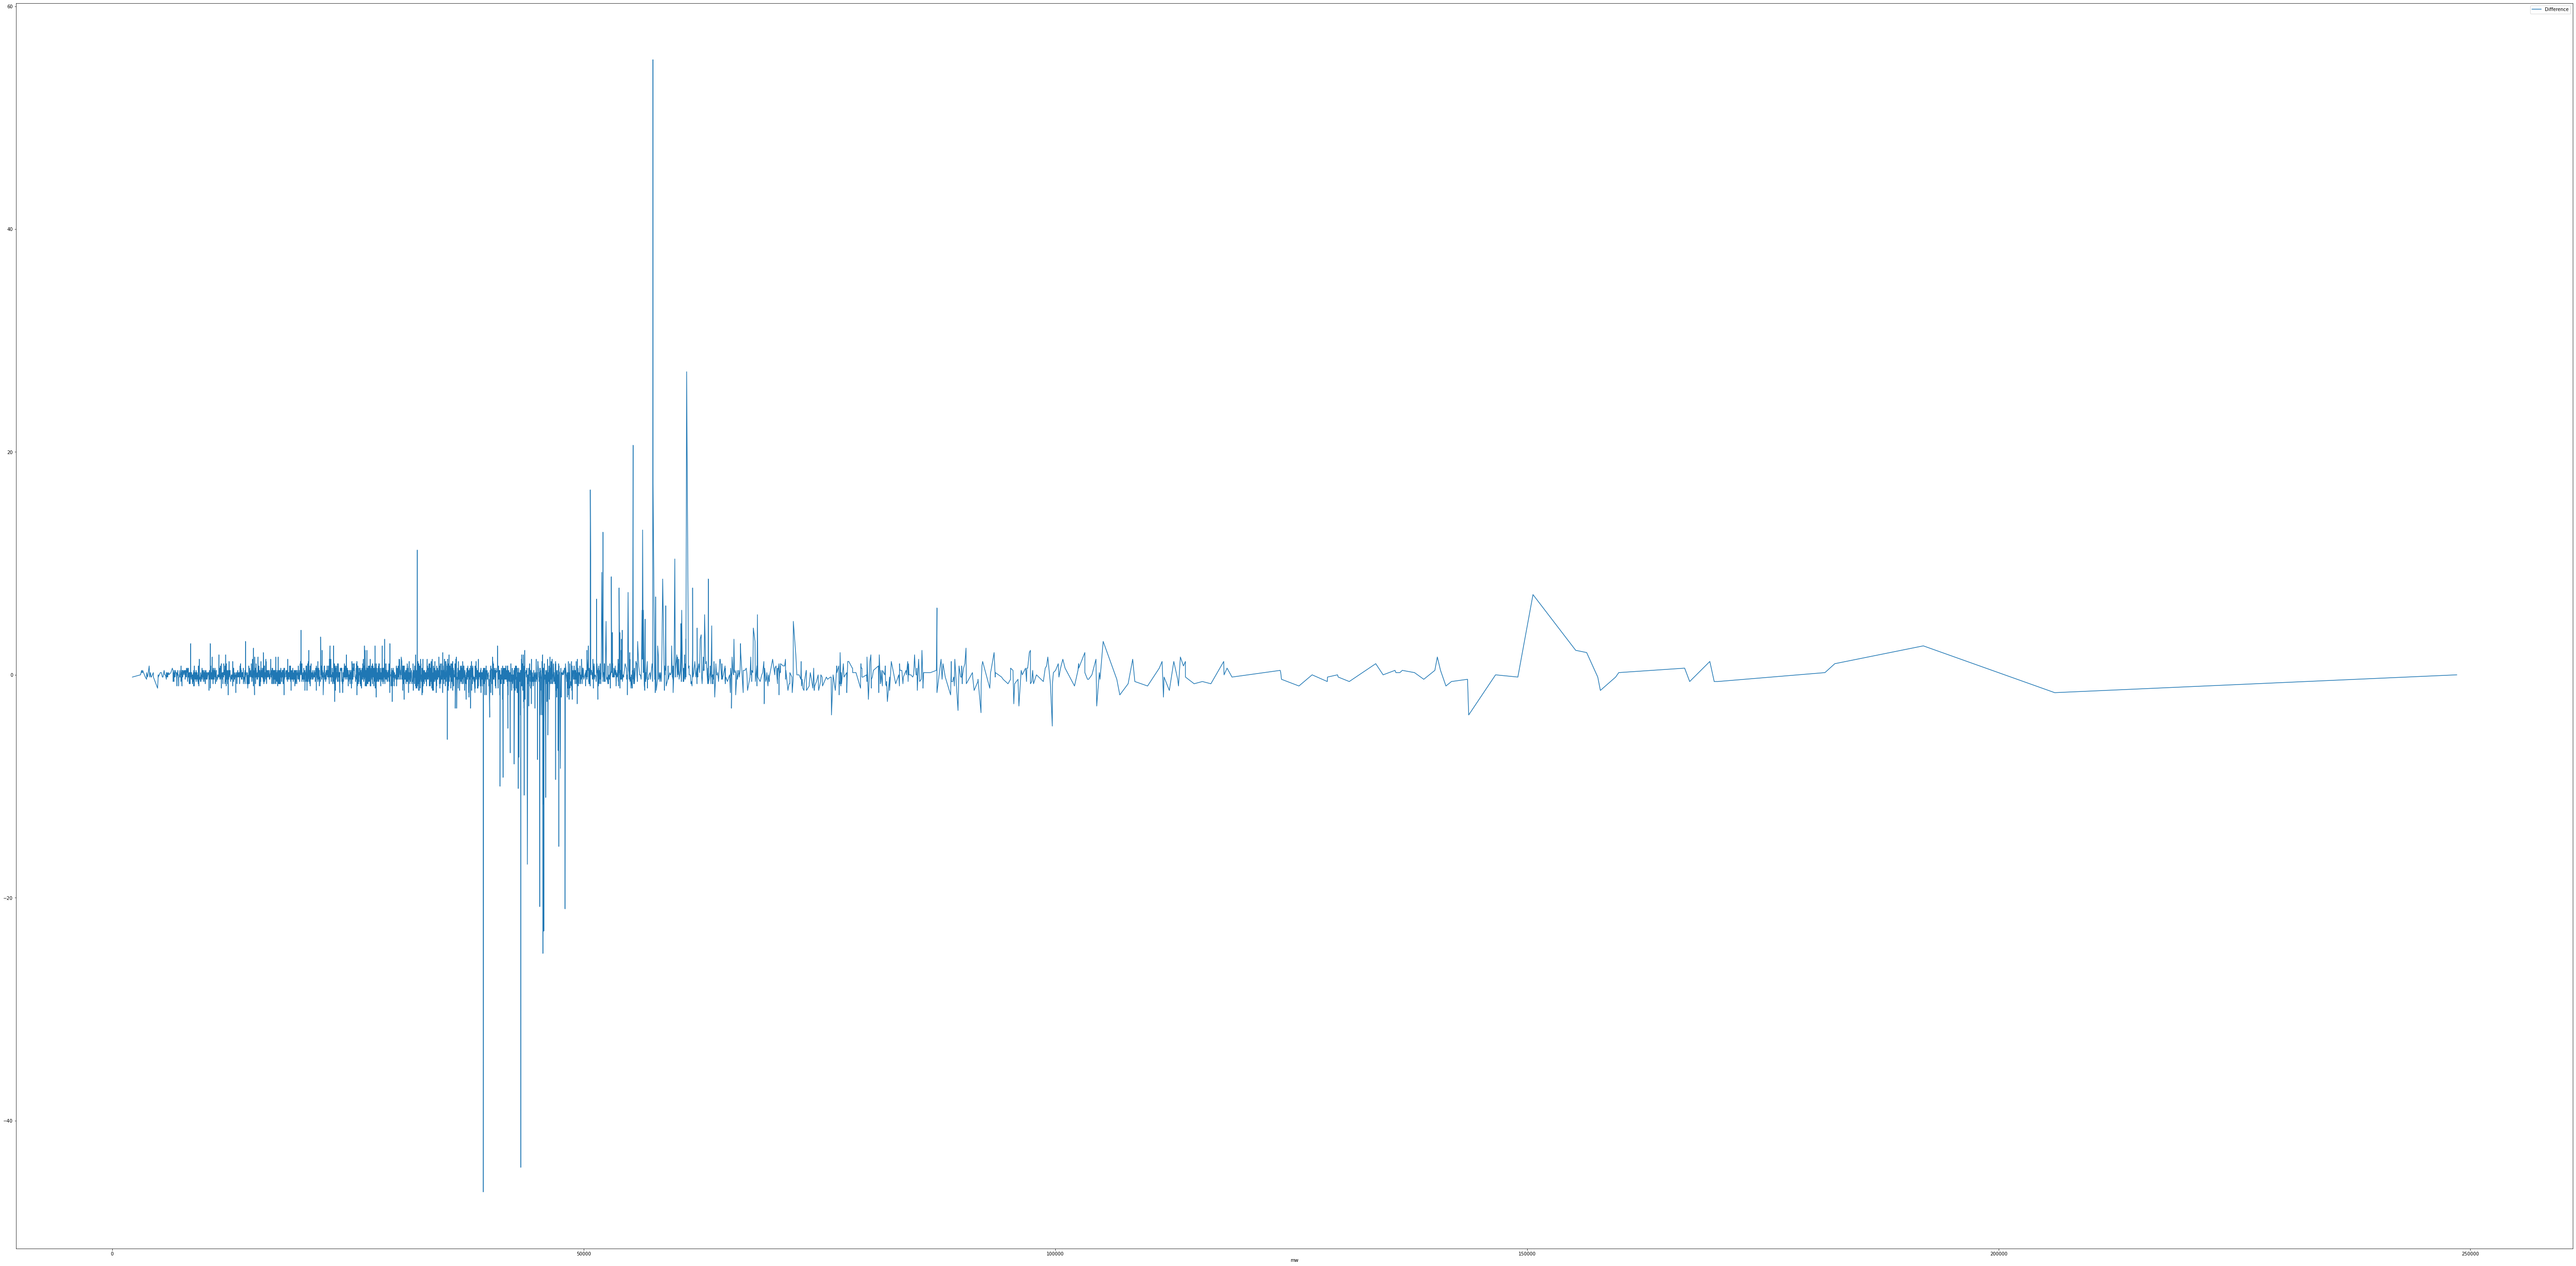

In [9]:
red_yel_Diffm_unmod = red_yel_Diff_copy.transpose().append(iPRG_MW.transpose()).dropna(axis = 1).transpose().set_index('mw')
red_yel_Diffm_unmod.sort_index(inplace = True)

red_yel_Diffm_unmod.plot()
plt.rcParams["figure.figsize"] = (100,50)
plt.show()

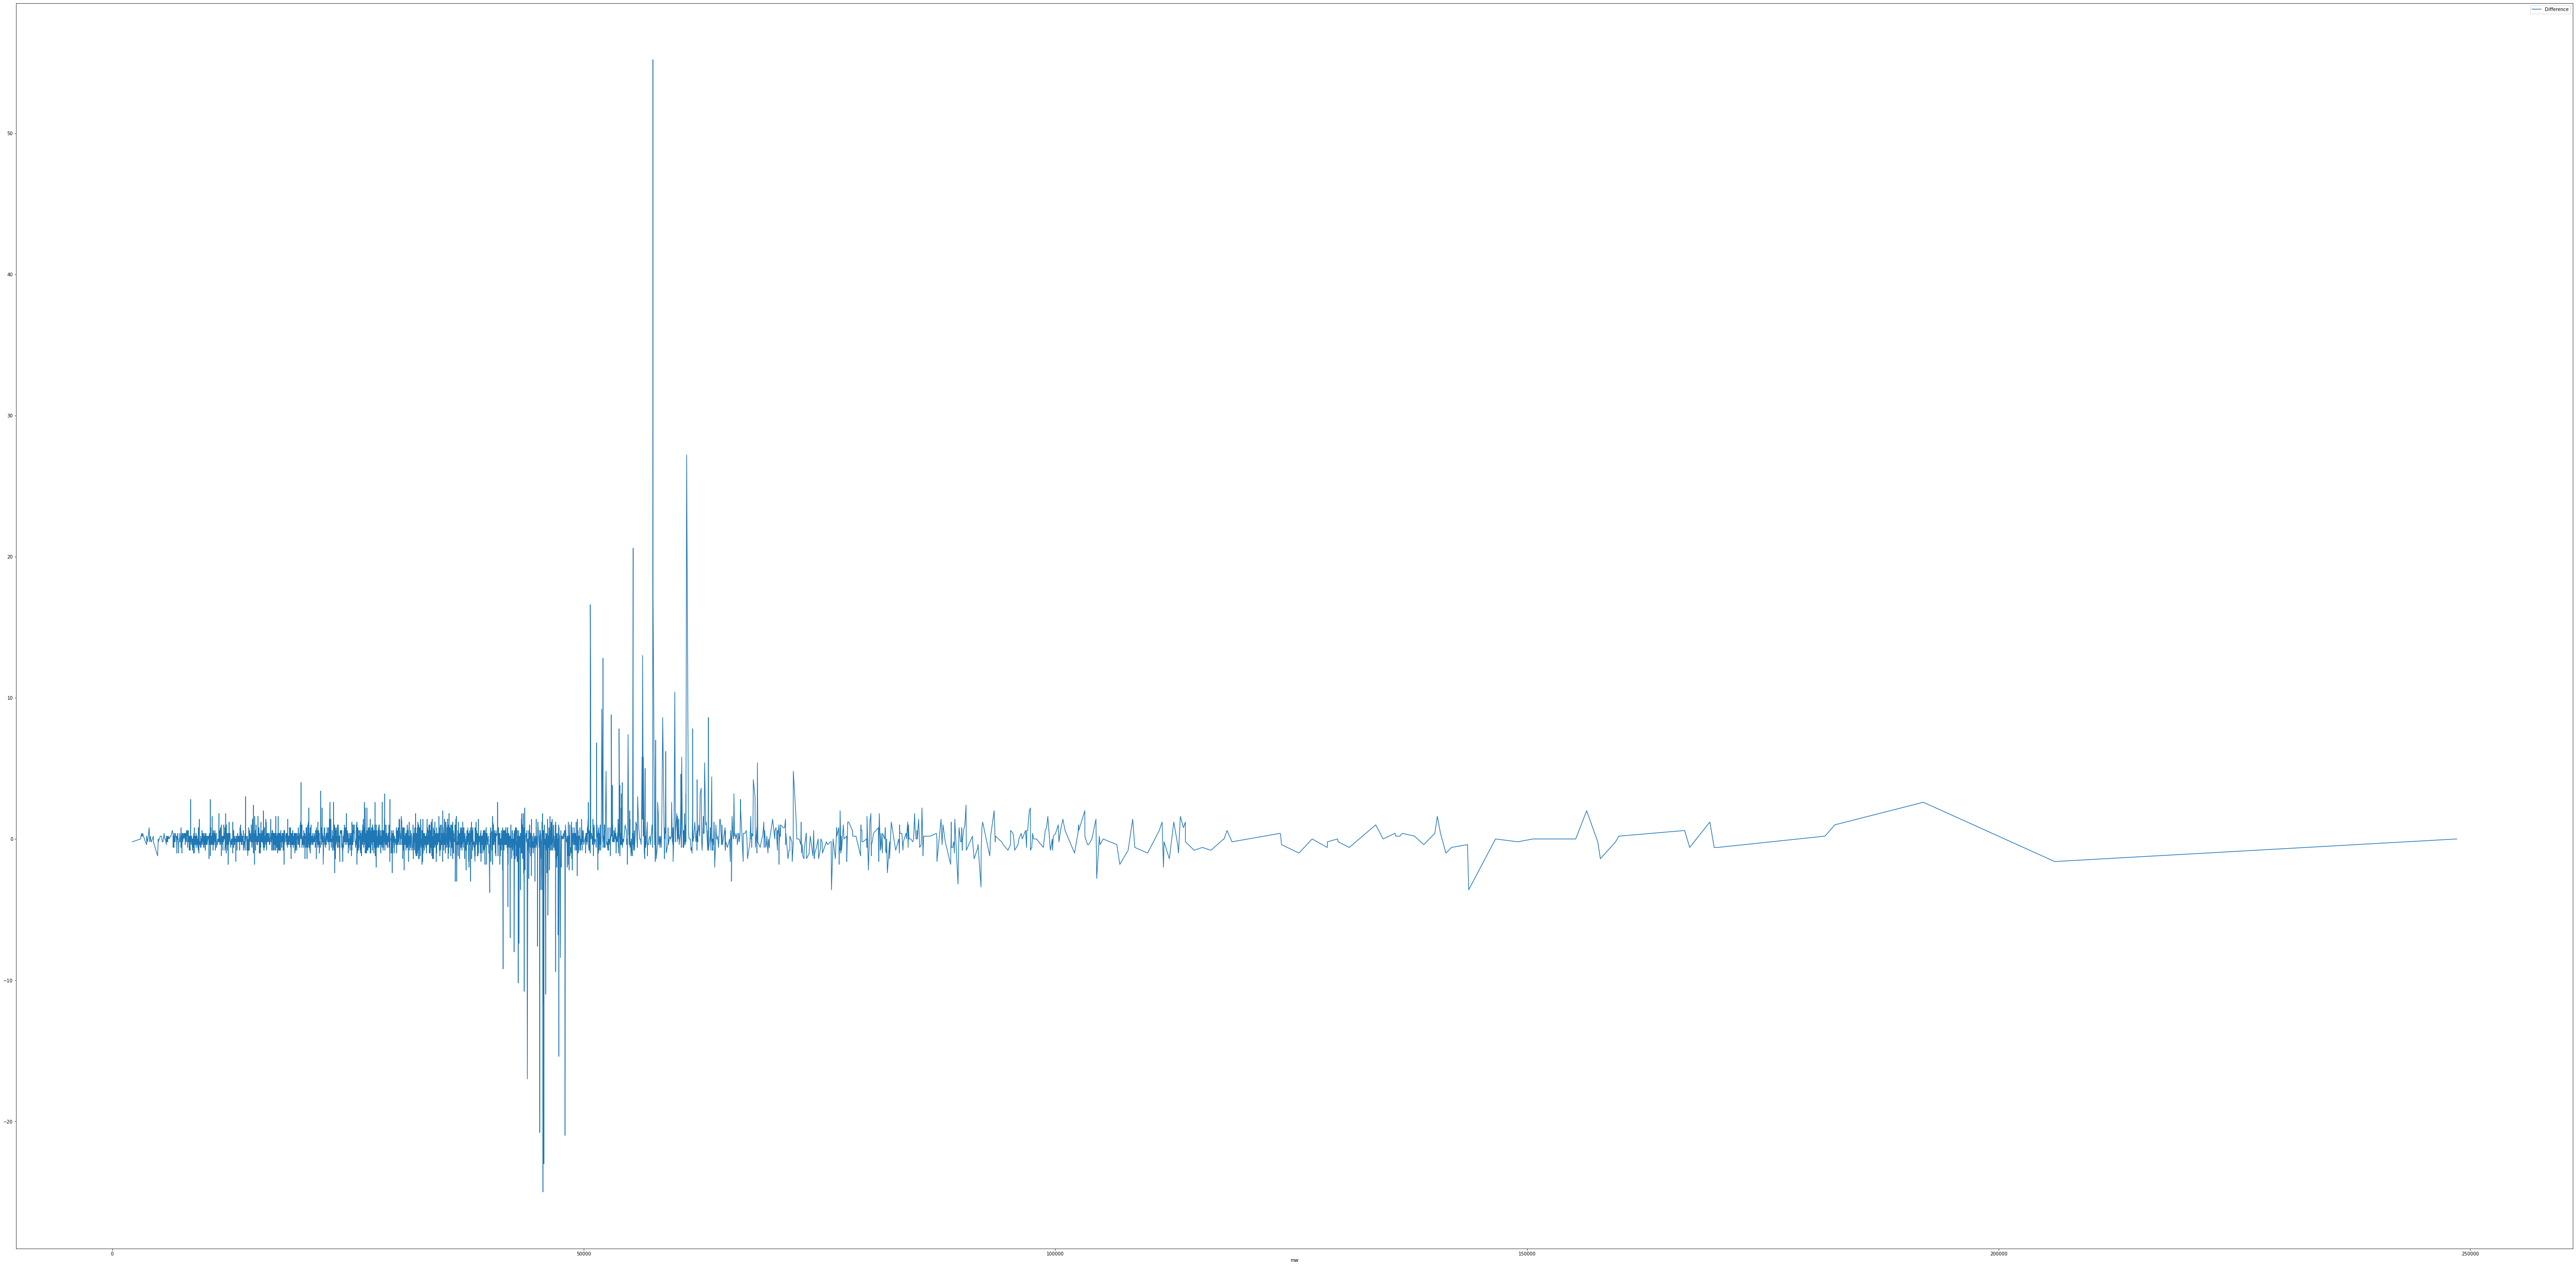

In [10]:
red_yel_Diffm = red_yel_Diff.transpose().append(iPRG_MW.transpose()).dropna(axis = 1).transpose().set_index('mw')
red_yel_Diffm.sort_index(inplace = True)

red_yel_Diffm.plot()
plt.rcParams["figure.figsize"] = (100,50)
plt.show()

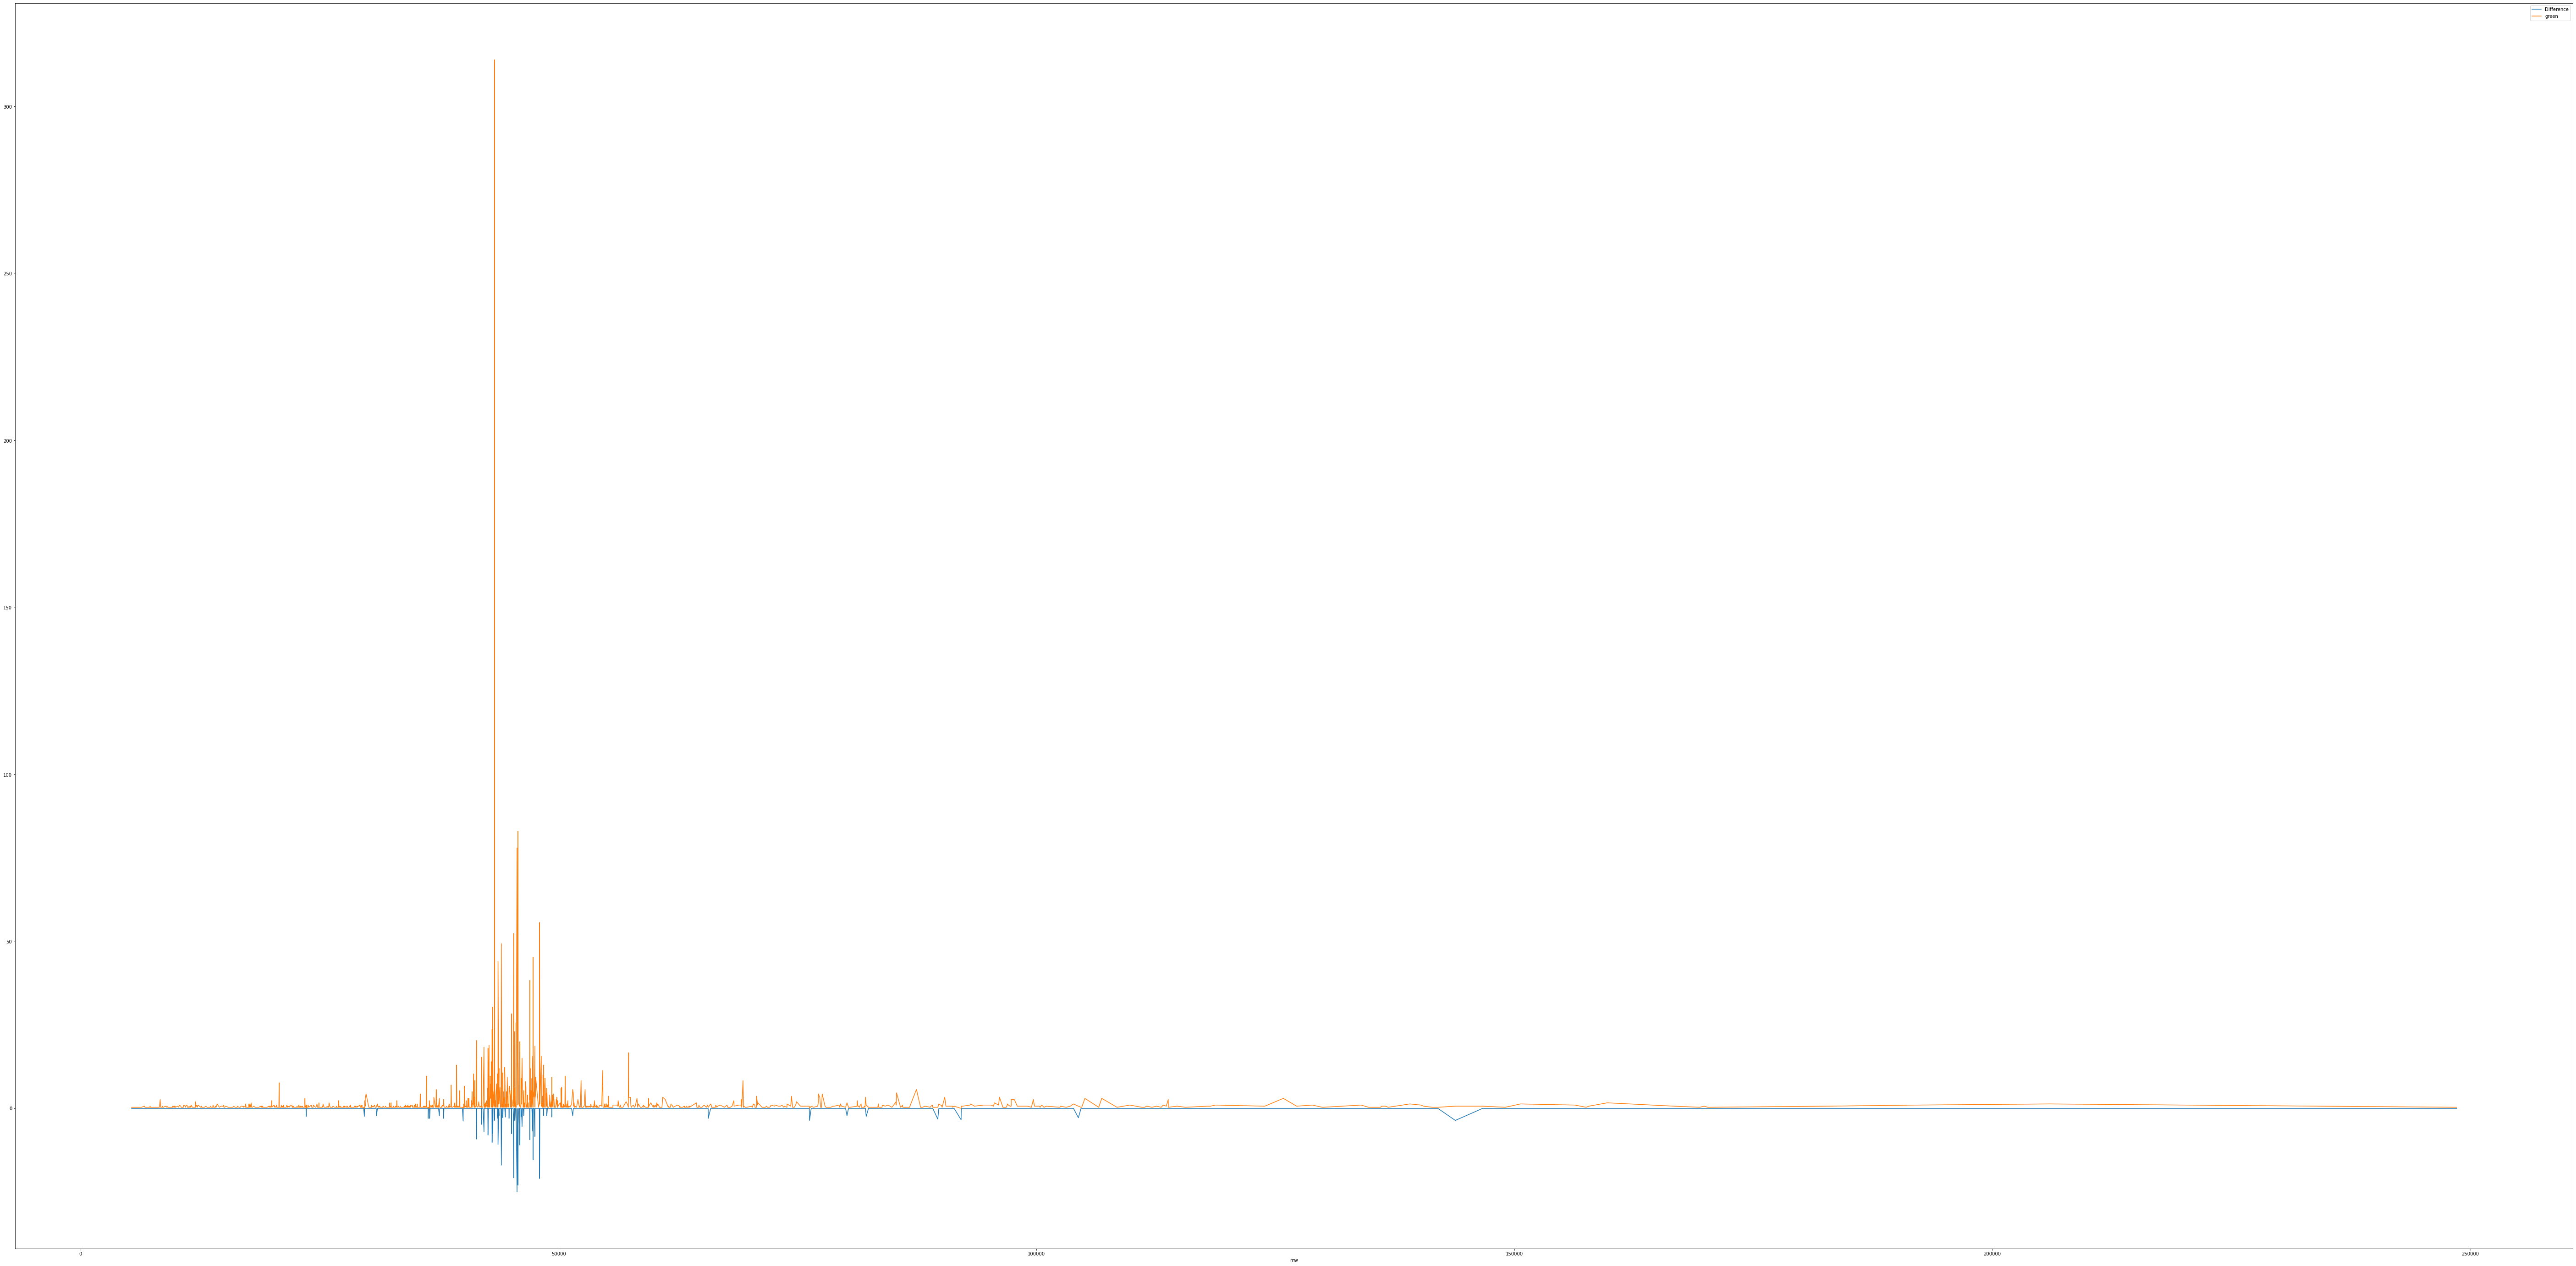

In [11]:
Mean_Gm_exp = Mean_G.transpose().append(iPRG_MW.transpose()).dropna(axis = 1).transpose().set_index('mw').transpose()

gg_diff_m = Mean_Gm.append(Mean_Gm_exp).transpose()
gg_diff_m.sort_index(inplace = True)
gg_diff_m = gg_diff_m.fillna(0)

gg_diff_m.plot()
plt.rcParams["figure.figsize"] = (100,50)
plt.show()

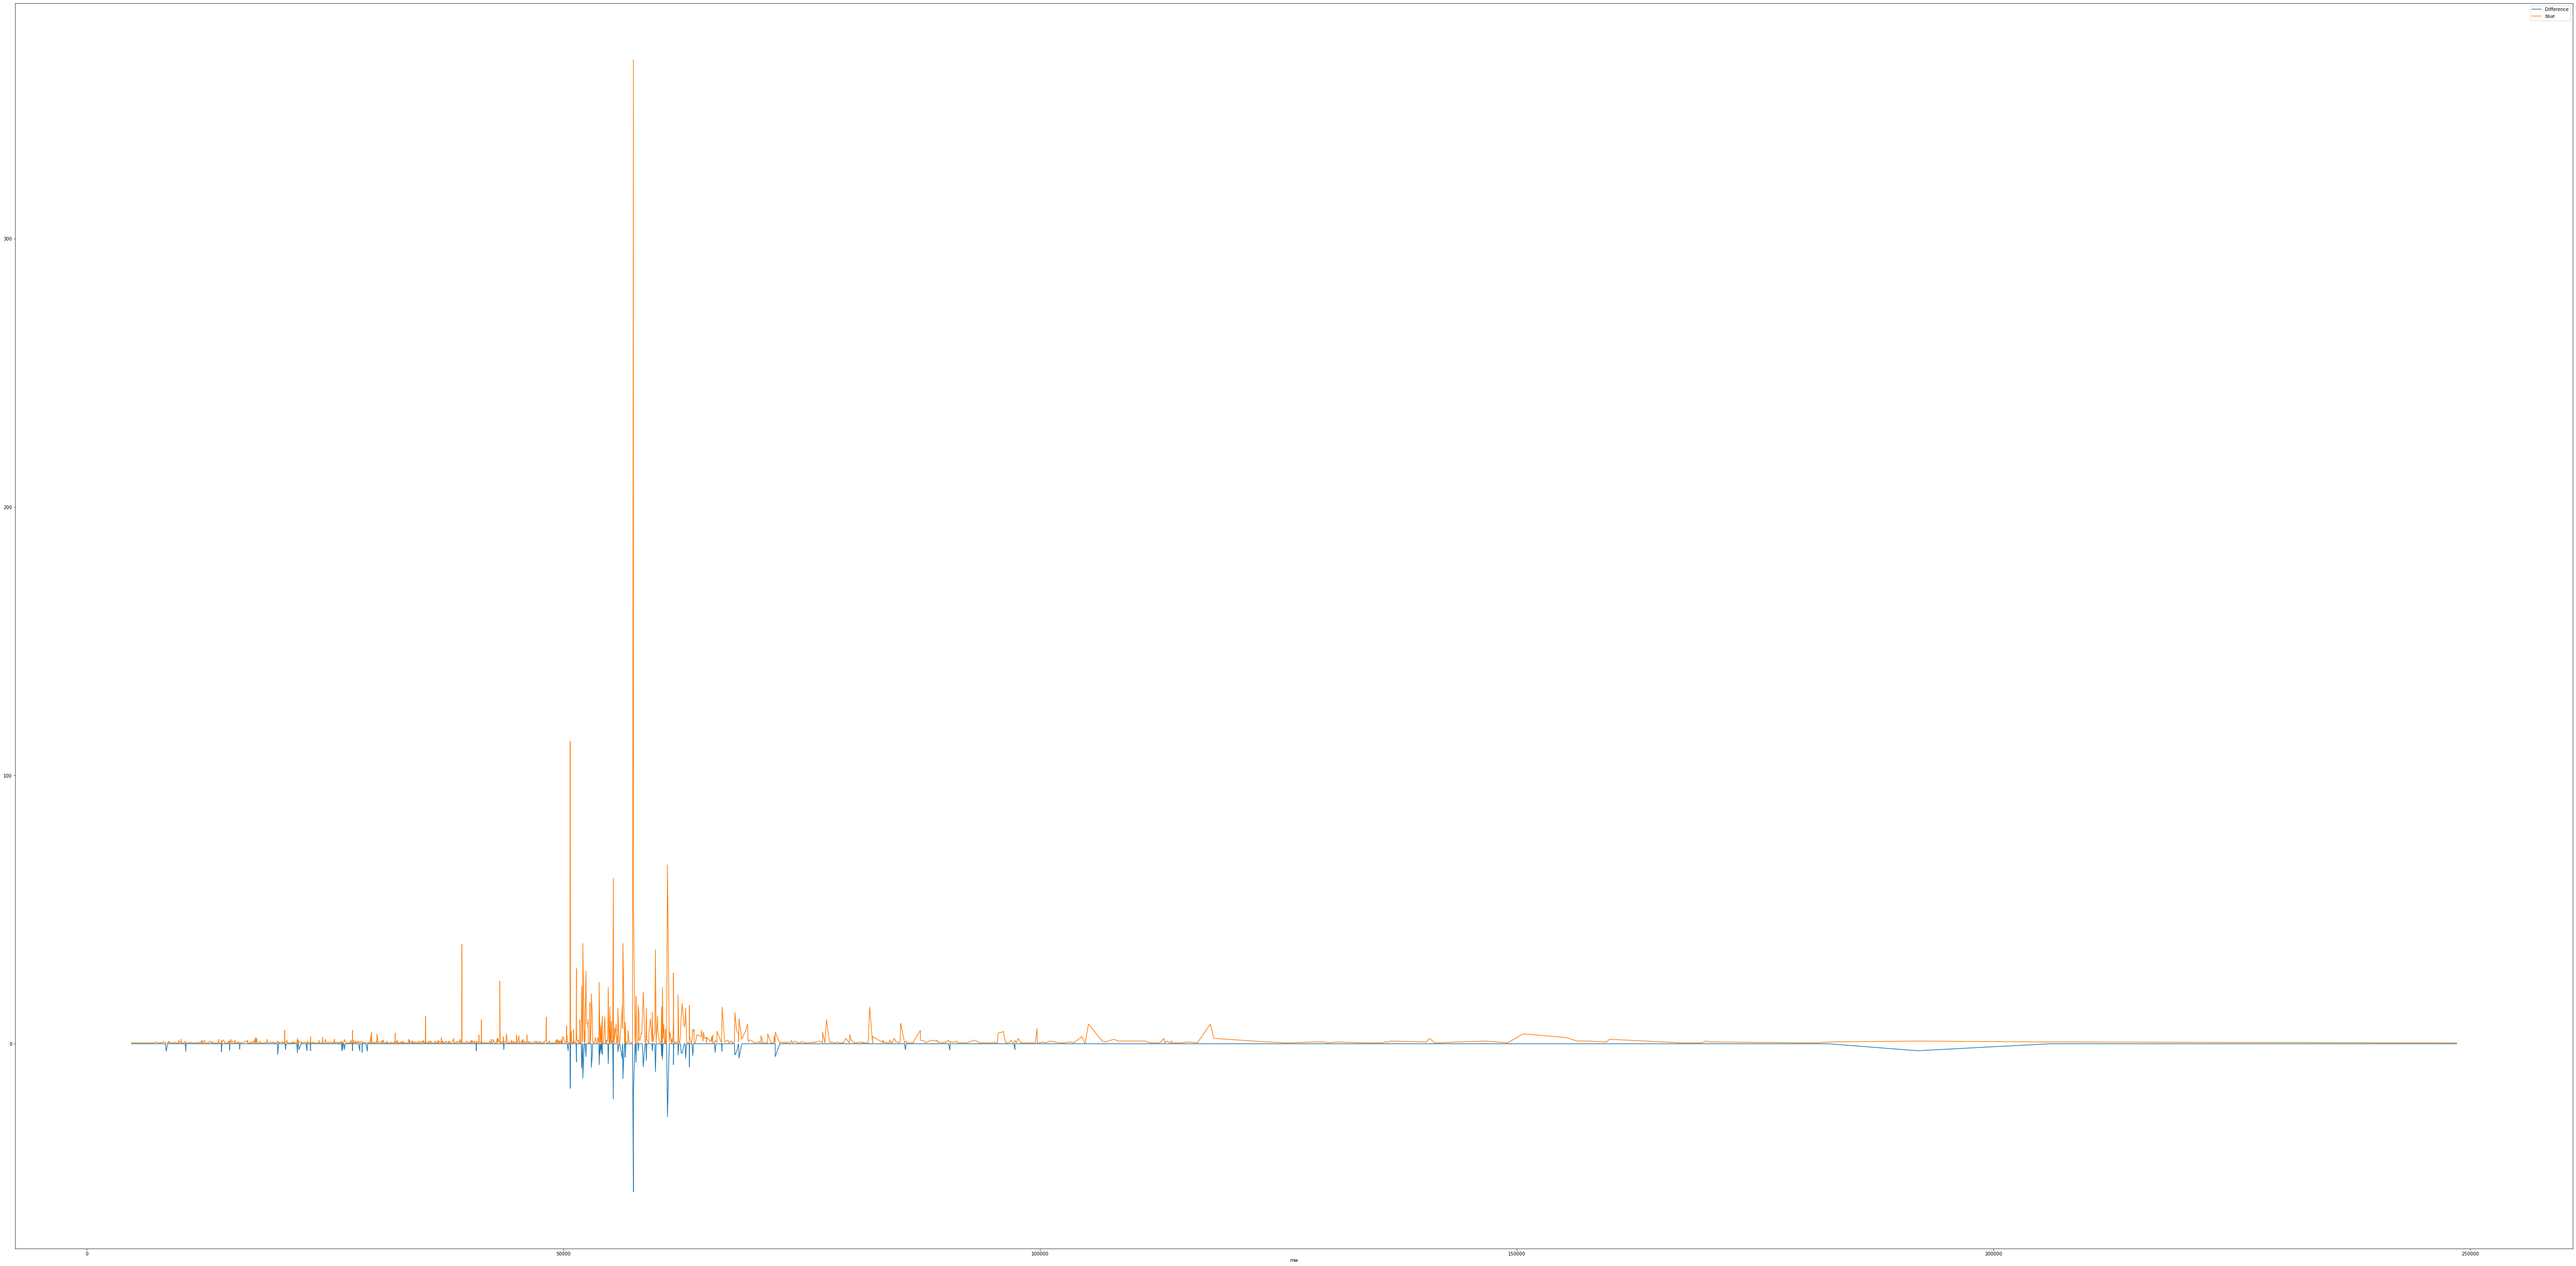

In [12]:
Mean_Bm_exp = Mean_B.transpose().append(iPRG_MW.transpose()).dropna(axis = 1).transpose().set_index('mw').transpose()

bb_diff_m = Mean_Bm.append(Mean_Bm_exp).transpose()
bb_diff_m.sort_index(inplace = True)
bb_diff_m = bb_diff_m.fillna(0)

bb_diff_m.plot()
plt.rcParams["figure.figsize"] = (100,50)
plt.show()

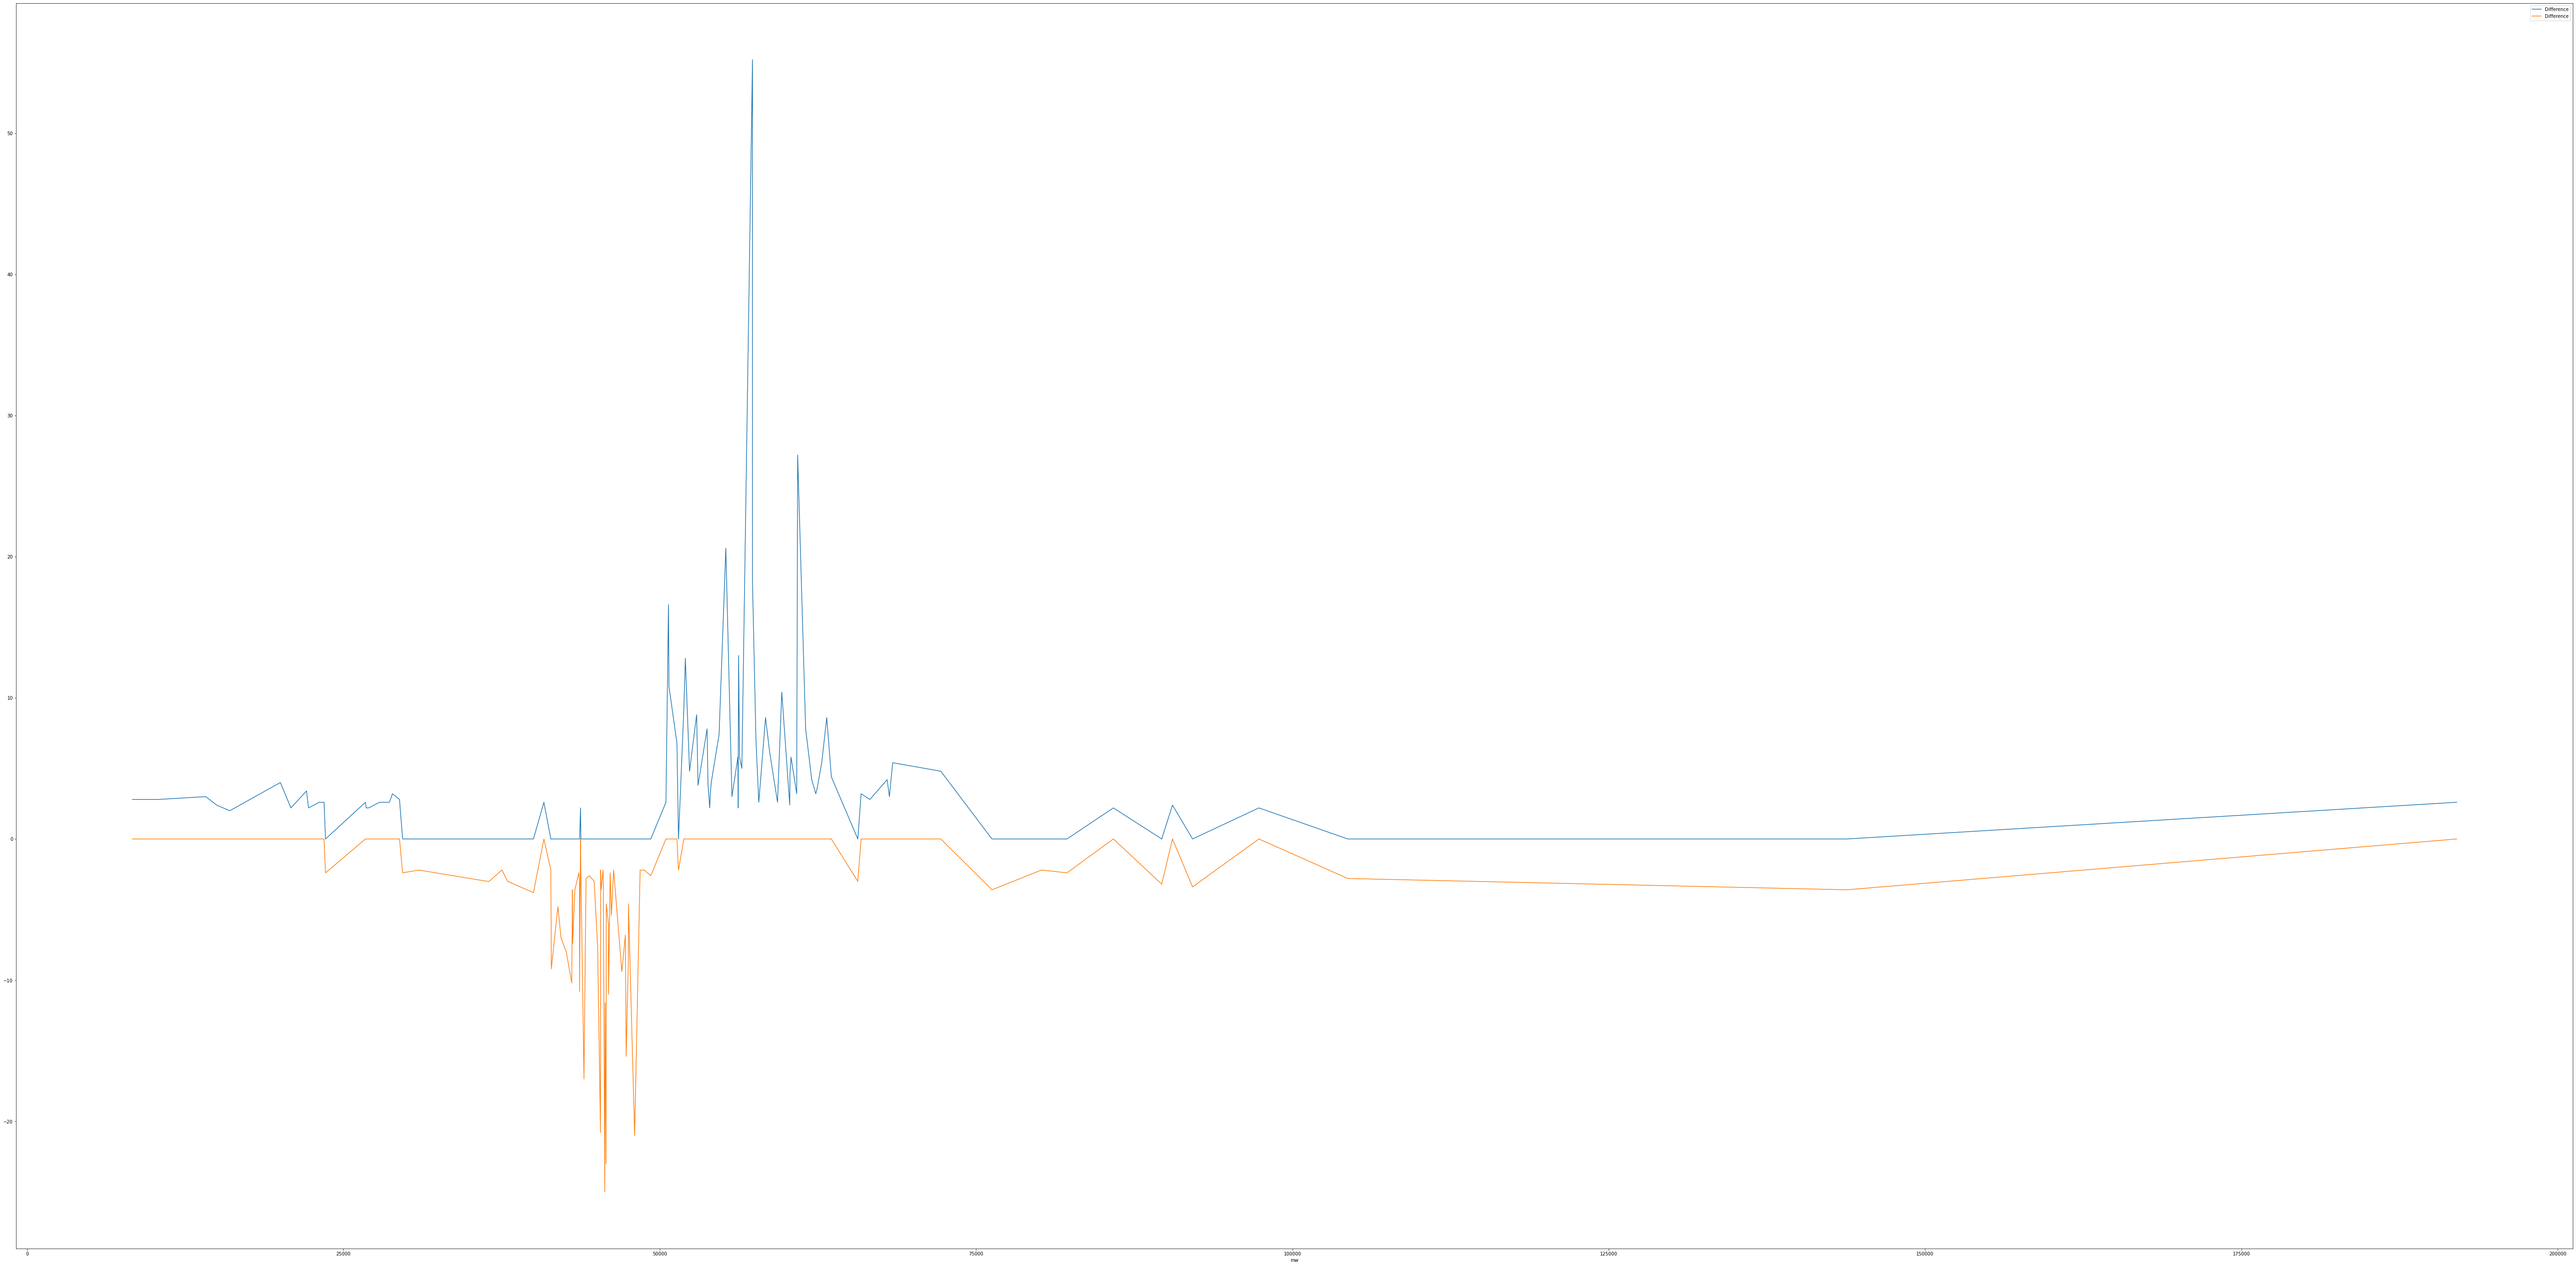

In [13]:
Mean_GB_mw = -Mean_Bm.append(-Mean_Gm).transpose()
Mean_GB_mw = Mean_GB_mw.fillna(0)

Mean_GB_mw.plot()
plt.rcParams["figure.figsize"] = (100,50)
plt.show()

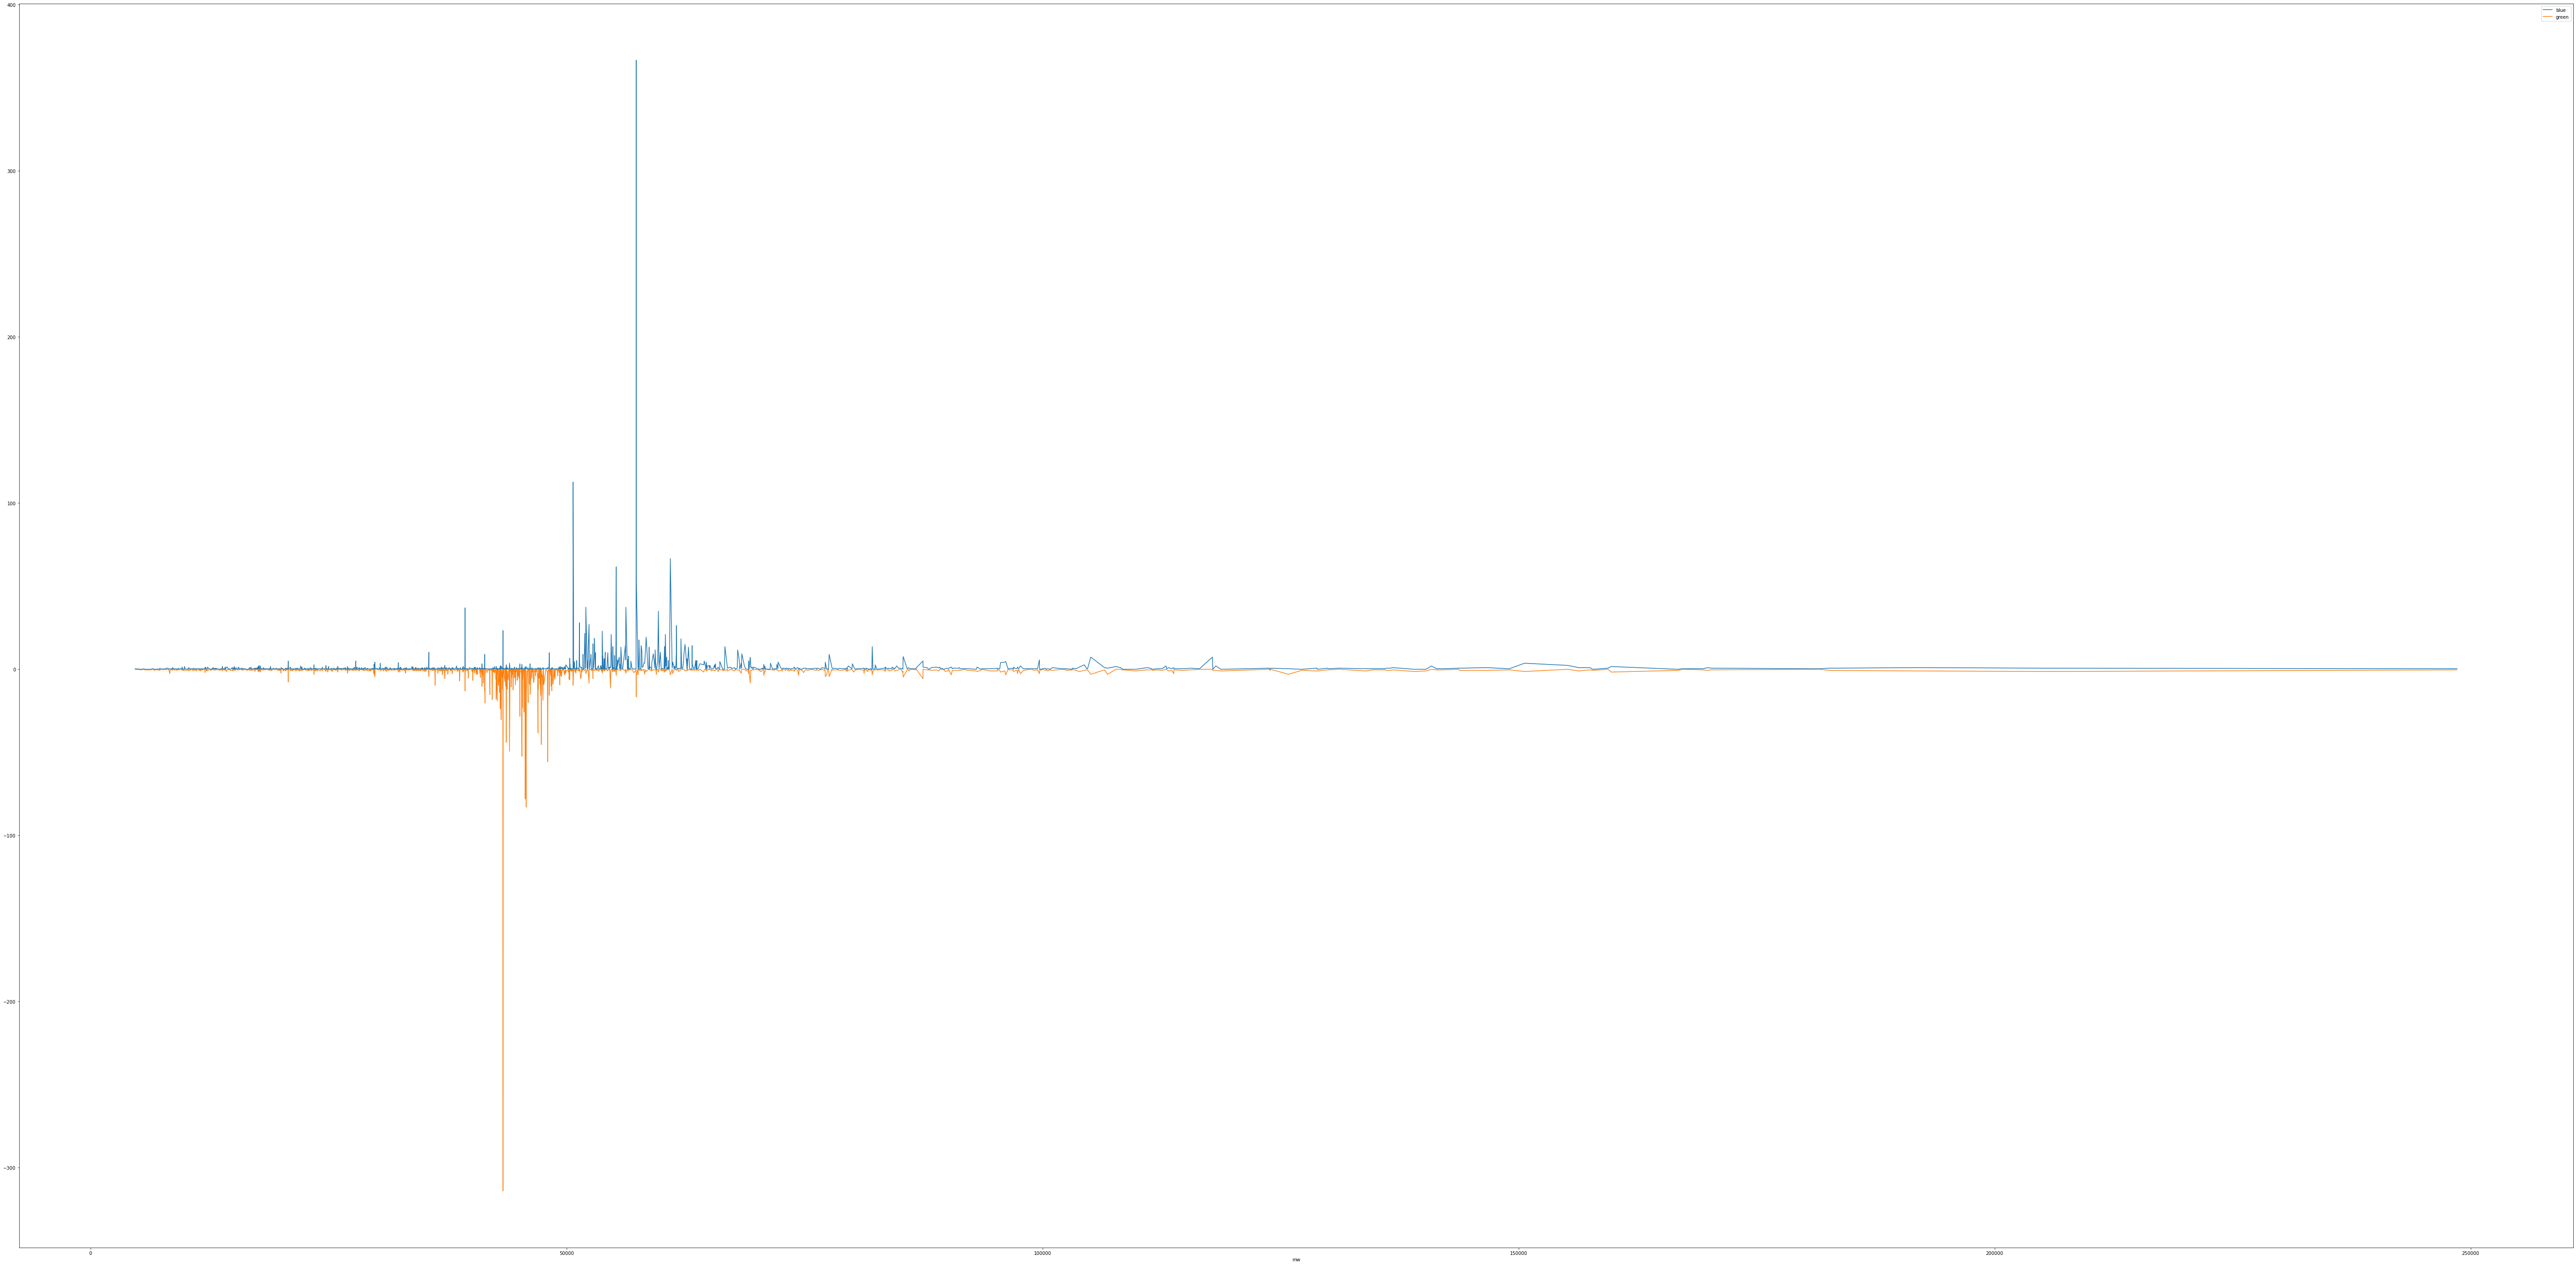

In [14]:
bg_diff_m = Mean_Bm_exp.append(-Mean_Gm_exp).transpose()
bg_diff_m = bg_diff_m.fillna(0)
bg_diff_m.sort_index(inplace = True)

bg_diff_m.plot()
plt.rcParams["figure.figsize"] = (100,50)
plt.show()